# Aggregateing real-world networks and visualizing its degree distribution

In [12]:
import pandas as pd
from itertools import groupby
from pandas import DataFrame

def construct_Net(datapath):
    G = nx.empty_graph()
    try:
        contact = pd.read_csv(datapath, header = None)
        source = list(contact[0])
        target = list(contact[1])
        for i in range(len(source)):
            G.add_edge(source[i],target[i])
        return G
    except:
        print "empty net!"
        return G

datapath = r"F:\DATASET\Reality.mit"

file_object = open(datapath)

contactList = []
contactList = [L.rstrip() for L in file_object]
# print contactList
file_object.close()

source = []
target = []
timestamp = []

# print contactList[1]
for i in contactList[1:]:
    u1, u = i.split(' ')
    u2, weight, time = u.split('\t')
    
    source.append(int(u1))
    target.append(int(u2))
    timestamp.append(int(time))
    
# print source
# print target
# print timestamp

df = DataFrame({'ID1':source, 'ID2':target, 'timestamp':timestamp})
# print df

count =  df.groupby([df['ID1'],df['ID2']]).size()  # (ID1, ID2, weight)

# write aggregated network into a csv
datapath = r"F:\DATASET\Reality\aggregatedNet.csv"   # write weighted net into a csv file
count.to_csv(datapath)
print('Temporal networks have been aggregated!')

# visualize aggregated network
# aggreNetPath =  r"C:\Users\CAN_LC\Desktop\%s\aggregatedNet.csv"%DATASET
# aggreG = construct_Net(aggreNetPath)

# print "Network has %s nodes" % len(aggreG.nodes())
# print "Network has %s edges" % len(aggreG.edges())
# print nx.number_connected_components(aggreG)
# # nx.draw(aggreG,pos=nx.spectral_layout(aggreG))  # spectral_layout
# # plt.show()

# # plot degree distribution of aggregated network
# degree = nx.degree_histogram(aggreG)
# print degree
# x = range(len(degree))
# y = [z/float(sum(degree)) for z in degree]
# plt.loglog(x,y,'ro')
# plt.show()


Temporal networks have been aggregated!


Network has 96 nodes
Network has 2539 edges
1


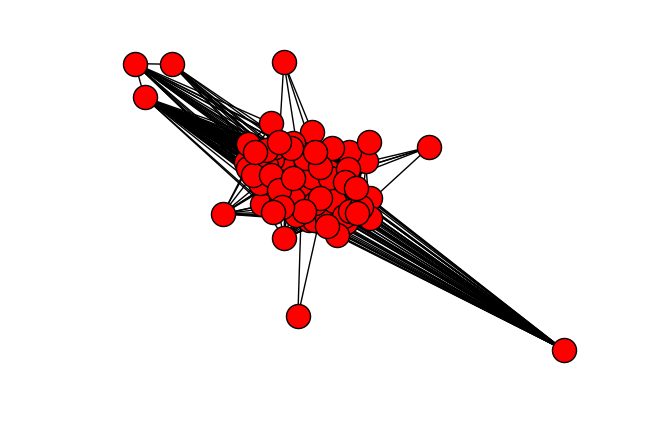

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# visualize aggregated network
aggreNetPath =  r"F:\DATASET\Reality\aggregatedNet.csv"
aggreG = construct_Net(aggreNetPath)

print "Network has %s nodes" % len(aggreG.nodes())
print "Network has %s edges" % len(aggreG.edges())
print nx.number_connected_components(aggreG)
nx.draw(aggreG,pos=nx.spring_layout(aggreG))  # spectral_layout
plt.show()

# Model with both Node and Link Memory 

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
import itertools

# generate powerlaw random number (Inverse Transform Method)
def powerlaw_num(v,xmin=0.01):
    x = random.random()
    return (xmin**(1-v)-(xmin**(1-v)-1)*x)**(1./(1-v))

# initiating nodes & links and its duration dict 

acitve node:

1.0
acitve link ratio:

1.0
acitve node:

0.27
acitve link ratio:

0.0179797979798
acitve node:

0.77
acitve link ratio:

0.000808080808081
acitve node:

0.52
acitve link ratio:

0.0
acitve node:

0.58
acitve link ratio:

0.0
acitve node:

0.62
acitve link ratio:

0.0
acitve node:

0.51
acitve link ratio:

0.0
acitve node:

0.59
acitve link ratio:

0.0
acitve node:

0.56
acitve link ratio:

0.0
acitve node:

0.57
acitve link ratio:

0.0
acitve node:

0.6
acitve link ratio:

0.0
acitve node:

0.45
acitve link ratio:

0.0
acitve node:

0.68
acitve link ratio:

0.0
acitve node:

0.48
acitve link ratio:

0.0
acitve node:

0.61
acitve link ratio:

0.0
acitve node:

0.54
acitve link ratio:

0.0
acitve node:

0.58
acitve link ratio:

0.0
acitve node:

0.48
acitve link ratio:

0.0
acitve node:

0.65
acitve link ratio:

0.0
acitve node:

0.46
acitve link ratio:

0.0
nodeDurationList:


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

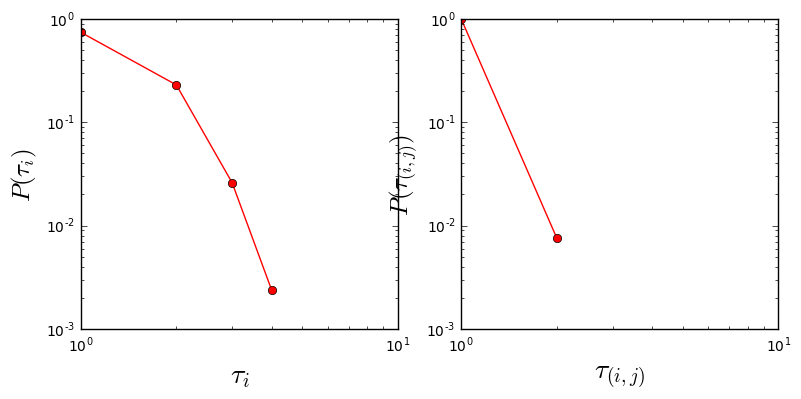

In [38]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
import itertools

N = 100
T = 20
dt = 1
cn = 1
cl = 1

# initiating  all nodes and its duration dict
nodeList = range(N)     # all possible active nodes
node_durationDict = {}.fromkeys(nodeList,0)
# print node_durationDict

# initiating  all links and its duration dict
G0 = nx.complete_graph(N)
linkList = G0.edges()   # all possible active links
link_durationDict = {}.fromkeys(linkList,0)
# print link_durationDict
##############################################################
nodeDurationList = []
linkDurationList = []
for ti in range(T):
    ## update all node duration dict
    # activeNode = []
    inactiveNode = []
    for i in nodeList:
        x = (1 + node_durationDict[i])**(-2)
    #         print 'prob is',cn * x * dt
        if random.random() < cn * x * dt:
            node_durationDict[i] += 1
    #         activeNode.append(i)    # record acitve node
        else:
            nodeDurationList.append(node_durationDict[i])
            node_durationDict[i] = 0
            inactiveNode.append(i)  # record inactive node
    print 'acitve node:\n\n',1-len(inactiveNode)/float(N)

    ## delete links attached to inacitve node
    Gtemp = G0
    for i in inactiveNode:
        for link in linkList:
            if i in link:
                link_durationDict[link] = 0
        for j in nodeList:
            if Gtemp.has_edge(i,j):
                Gtemp.remove_edge(i,j)

    ## update all links duration dict
    activeLink = []
    # inactiveLink = []
    for j in Gtemp.edges():
        y = (1 + link_durationDict[j])**(-2)
    #         print 'prob is',cl * y * dt
        if random.random() < cl * y * dt:
            link_durationDict[j] += 1
            activeLink.append(j)
        else:
            linkDurationList.append(link_durationDict[j])
            link_durationDict[j] = 0
            # inactiveLink.append(j)
    print 'acitve link ratio:\n\n',len(activeLink)/float(len(linkList))

print 'nodeDurationList:\n\n\n',nodeDurationList
print 'linkDurationList:\n\n\n',linkDurationList
###################### Drawing ######################################
fig = plt.figure(figsize=(9,4))
ax1 = plt.subplot(121)
x1 = []
y1 = []
for i in set(nodeDurationList):
    x1.append(i)
#     print i
    y1.append(nodeDurationList.count(i))
    print(i,nodeDurationList.count(i))
print y1

yy1 = np.array(y1)/float(sum(y1))

ax1.set_xlabel("$\\tau_i}$",fontsize=20)  # in 20s
ax1.set_ylabel("$P(\\tau_i)$",fontsize=18)
# ax.set_title("link duration time distribution\n (HT09)",fontsize=15)
# ax.text(500,0.1,'Model',fontsize=18)
plt.loglog(x1,yy1,'r-o')


ax2 = plt.subplot(122)
x2 = []
y2 = []
for j in set(linkDurationList):
    x2.append(j)
#     print i
    y2.append(linkDurationList.count(j))
    print(j,linkDurationList.count(j))
print y2

yy2 = np.array(y2)/float(sum(y2))

ax2.set_xlabel("$\\tau_{(i,j)}$",fontsize=20)  # in 20s
ax2.set_ylabel("$P(\\tau_{(i,j)})$",fontsize=18)
# ax.set_title("link duration time distribution\n (HT09)",fontsize=15)
# ax.text(500,0.1,'Model',fontsize=18)
plt.loglog(x2,yy2,'r-o')

plt.show()

28
[1, 3, 4, 0]
6


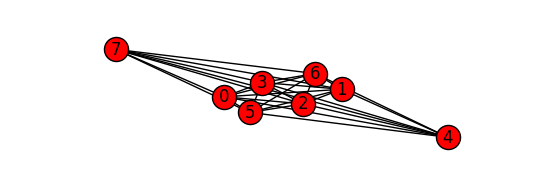

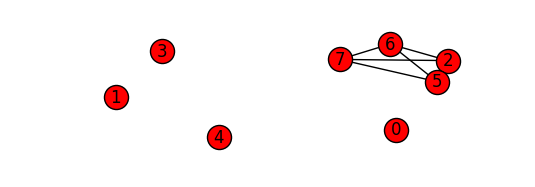

In [195]:
N = 8

node_durationDict = {}
link_durationDict = {}

nodeList = range(N)    # all possible active nodes
G0 = nx.complete_graph(N)
linkList = G0.edges()  # all possible active links
print len(linkList)

fig = plt.figure(figsize=(6,4))
ax1 = plt.subplot(211)
# color = random.sample(colors,len(size))
# size = list((np.array(list(G0.degree(nodeList).values()))+1)*70)
nx.draw(G0,pos=nx.spring_layout(G0), with_labels = True)  # spectral_layout
# nx.draw(G0,pos=nx.spring_layout(G0), node_color = colors, node_size = size, with_labels = True)


inactiveNodes = random.sample(nodeList,N/2)
print inactiveNodes
# ebunch = itertools.combinations(inactiveNodes,2)
for i in inactiveNodes:
    for j in nodeList:
        if G0.has_edge(i,j):
            G0.remove_edge(i,j)

remainlinkList = G0.edges()
print len(remainlinkList)

fig = plt.figure(figsize=(6,4))
ax2 = plt.subplot(212)


# color = random.sample(colors,len(size))
# size = list((np.array(list(G0.degree(nodeList).values()))+2)*90)
nx.draw(G0,pos=nx.spring_layout(G0),with_labels = True)
# nx.draw(G0,pos=nx.spring_layout(G0), node_color = colors, node_size = size, with_labels = True)
plt.show()

28
[2, 1, 6, 0]
6


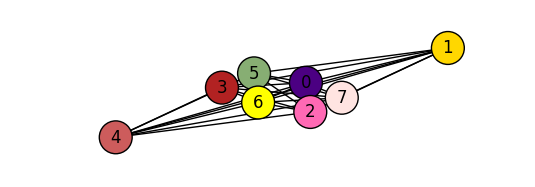

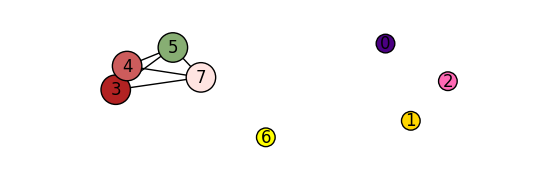

In [194]:
N = 8

node_durationDict = {}
link_durationDict = {}

nodeList = range(N)    # all possible active nodes
G0 = nx.complete_graph(N)
linkList = G0.edges()  # all possible active links
print len(linkList)

fig = plt.figure(figsize=(6,4))
ax1 = plt.subplot(211)
color = random.sample(colors,len(size))
size = list((np.array(list(G0.degree(nodeList).values()))+1)*70)
# nx.draw(G0,pos=nx.spring_layout(G0), with_labels = True)  # spectral_layout
nx.draw(G0,pos=nx.spring_layout(G0), node_color = colors, node_size = size, with_labels = True)


inactiveNodes = random.sample(nodeList,N/2)
print inactiveNodes
# ebunch = itertools.combinations(inactiveNodes,2)
for i in inactiveNodes:
    for j in nodeList:
        if G0.has_edge(i,j):
            G0.remove_edge(i,j)

remainlinkList = G0.edges()
print len(remainlinkList)

fig = plt.figure(figsize=(6,4))
ax2 = plt.subplot(212)


# color = random.sample(colors,len(size))
size = list((np.array(list(G0.degree(nodeList).values()))+2)*90)
# nx.draw(G0,pos=nx.spring_layout(G0),with_labels = True)
nx.draw(G0,pos=nx.spring_layout(G0), node_color = colors, node_size = size, with_labels = True)
plt.show()

In [ ]:
N = 100
dt = 1
z = 
link_inact_p = z * d 

G = nx.Graph()
G.add_nodes_from(range(N))
